# `TD Learning` 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets

In [81]:
def Simple_TD_learning(p,eta,iters):
    Num_states = 9
    Num_moves = 4
    grid = np.zeros((5, 5))
    target_grid = grid[1:4, 1:4]
    rewards = np.zeros((5, 5))
    Values_matrix = np.zeros((3, 3))

# Create a boolean mask for the target grid
    mask = np.ones_like(rewards, dtype=bool)
    mask[1:4, 1:4] = False  # Target grid is False, others are True
    mask1 = np.zeros_like(rewards, dtype=bool)
    mask1[1:4, 1:4] = True  # Target grid is True
    starting_position = (1, 1)
    goal_position = (3, 3)
# Set non-target squares to -10
    rewards[mask] = -10
    rewards[mask1] = -1
    rewards[goal_position] = 10
    moves = [(0, 1), (0, -1), (1, 0), (-1, 0)]
    bernouli_vector = np.random.binomial(1, p, iters)
    for i in range(iters):
        state = starting_position
        if bernouli_vector[i] == 1:
            #Find move to the next state that maximizes the value function
            #delta = rewards[state] + Values_matrix[next_state] - Values_matrix[state]
            move = np.argmax(rewards[state] + Values_matrix[state[0] + moves[0], state[1] + moves[1]] - Values_matrix[state] for move in moves) 
        else:
            move = np.random.choice(Num_moves, 1-p)
        next_state = (state[0] + moves[move][0], state[1] + moves[move][1])
        if next_state[0] < 0 or next_state[0] >= 5 or next_state[1] < 0 or next_state[1] >= 5:
            Values_matrix[state] = -10
            break
        if mask1[next_state]:
            Values_matrix[state] = -1
        if next_state == goal_position:
            Values_matrix[state] = 10
        Values_matrix[state] = Values_matrix[state] + eta * (rewards[state] + Values_matrix[next_state] - Values_matrix[state])
        state = next_state

    return rewards
    
# rewards of all moves that would lead to falling outside the target grid are -10

# Transition probabilities

In [2]:
import numpy as np

def Simple_TD_learning(p, eta, iters):
    """
    Simple Temporal-Difference (TD) Learning on a grid.

    Parameters:
    - p (float): Probability of choosing the greedy action.
    - eta (float): Learning rate.
    - iters (int): Number of episodes.

    Returns:
    - np.ndarray: Final Values_matrix representing state values.
    """
    grid_size = 5
    grid = np.zeros((grid_size, grid_size))
    
    # Define target grid indices (1 to 3 in both row and column)
    target_rows = slice(1, 4)
    target_cols = slice(1, 4)
    target_grid = grid[target_rows, target_cols]
    
    # Initialize rewards
    rewards = np.zeros((grid_size, grid_size))
    
    # Masks for target and non-target grid
    mask_non_target = np.ones_like(rewards, dtype=bool)
    mask_non_target[target_rows, target_cols] = False  # Non-target grid is True
    mask_target = ~mask_non_target  # Target grid is False
    
    starting_position = (1, 1)
    goal_position = (3, 3)
    
    # Set rewards
    rewards[mask_non_target] = -10   # Non-target squares
    rewards[mask_target] = -1        # Target squares
    rewards[goal_position] = 10      # Goal square
    
    # Define possible moves: Right, Left, Down, Up
    moves = [(0, 1), (0, -1), (1, 0), (-1, 0)]
    Num_moves = len(moves)
    
    # Initialize Values_matrix for target grid (3x3)
    Values_matrix = np.zeros((3, 3))
    
    # Set the goal's value to 10 and prevent its update
    goal_indices = (goal_position[0] - 1, goal_position[1] - 1)
    Values_matrix[goal_indices] = 10  # Fixed value for the goal
    max_change_per_episode = []
    
    for episode in range(iters):
        state = starting_position
        done = False  # Flag to indicate if the episode has ended
        max_change = 0  # Track the maximum change in V(s) for this episode
        while not done:
            # Decide whether to choose greedy or random action
            if np.random.rand() < p:
                # **Greedy Action Selection:** Choose the move that maximizes V(s')
                action_values = []
                for move in moves:
                    next_r = state[0] + move[0]
                    next_c = state[1] + move[1]
                    
                    # Check if the next state is within the grid
                    if 0 <= next_r < grid_size and 0 <= next_c < grid_size:
                        if (next_r, next_c) == goal_position:
                            v_next = Values_matrix[goal_position[0]-1, goal_position[1]-1] + rewards[goal_position[0] - 1, goal_position[1] - 1]
                        elif (1 <= next_r <=3) and (1 <= next_c <=3):
                            # Map to Values_matrix indices (subtracting 1)
                            v_next = Values_matrix[next_r -1, next_c -1] + rewards[next_r-1, next_c-1]
                        else:
                            v_next = -10  # Value for non-target, non-goal states
                        action_values.append(v_next)
                    else:
                        # Move leads outside grid; assign a very low value
                        action_values.append(-np.inf)
                
                # Choose the move with the highest V(s')
                move = np.argmax(action_values)
            else:
                # **Random Action Selection:** Choose a random move
                move = np.random.choice(Num_moves)
            
            # Execute the chosen move
            selected_move = moves[move]
            next_state = (state[0] + selected_move[0], state[1] + selected_move[1])
            
            if not (0 <= next_state[0] < grid_size and 0 <= next_state[1] < grid_size):
                    # **Agent has moved outside the grid (invalid move)**
                    if 1 <= state[0] <=3 and 1 <= state[1] <=3:
                        # Current state is within target grid; assign a penalty via TD update
                        reward = -10
                        v_next = 0  # No future value since it's terminal
                        v_current = Values_matrix[state[0]-1, state[1]-1]
                        delta = reward + v_next - v_current
                        Values_matrix[state[0]-1, state[1]-1] += eta * delta
                    done = True  # End the episode
                    continue  # Proceed to the next episode
            
            # **Determine the reward + v for the next_state**
            if next_state == goal_position:
                reward = 10
                v_next = 10
            elif 1 <= next_state[0] <=3 and 1 <= next_state[1] <=3:
                reward = -1
                v_next = Values_matrix[next_state[0]-1, next_state[1]-1]
            else:
                reward = -10
                v_next = -10 
            
           
            # **Retrieve V(s) for the TD update**
            if (1 <= state[0] <=3) and (1 <= state[1] <=3):
                v_current = Values_matrix[state[0]-1, state[1]-1]
            else:
                v_current = 0  # Non-target grid states are considered to have zero value
            
            # **Compute the TD error (delta)**
            delta = reward + v_next - v_current
            
            # **Update V(s) using the TD update rule**
            if (1 <= state[0] <=3) and (1 <= state[1] <=3) and (state != goal_position):
                change = eta * delta
                Values_matrix[state[0]-1, state[1]-1] += change
                max_change = max(max_change, abs(change))

            # **Transition to the next state**
            state = next_state
            
            # **Check if the episode should end**
            if state == goal_position:
                done = True  # Reached the goal; end the episode
        max_change_per_episode.append(max_change)

    return Values_matrix, max_change_per_episode


## Policy:

In [2]:
def extract_policy(Values_matrix):
    moves = [(0, 1), (0, -1), (1, 0), (-1, 0)]
    policy = {}
    grid_size = 5
    goal_position = (3, 3)
    
    for r in range(1, 4):
        for c in range(1, 4):
            state = (r, c)
            if state == goal_position:
                continue  # Skip the goal state
            
            action_values = []
            for move in moves:
                next_r = r + move[0]
                next_c = c + move[1]
                
                if (next_r, next_c) == goal_position:
                    v_next = 10 + 10
                elif 1 <= next_r <=3 and 1 <= next_c <=3:
                    v_next = Values_matrix[next_r -1, next_c -1] - 1
                else:
                    v_next = -np.inf
                action_values.append(v_next)
            
            # Choose the move with the highest value
            best_move_index = np.argmax(action_values)
            best_move = moves[best_move_index]
            policy[state] = best_move
    
    return policy

# Example Usage:
final_values,max1 = Simple_TD_learning(p=0.8, eta=0.1, iters=30000)
optimal_policy = extract_policy(final_values)
print("Optimal Policy:")
for state, move in sorted(optimal_policy.items()):
    print(f"State {state}: Move {move}")


Optimal Policy:
State (1, 1): Move (1, 0)
State (1, 2): Move (1, 0)
State (1, 3): Move (1, 0)
State (2, 1): Move (1, 0)
State (2, 2): Move (1, 0)
State (2, 3): Move (1, 0)
State (3, 1): Move (0, 1)
State (3, 2): Move (0, 1)


In [3]:
A, max_values = Simple_TD_learning(0.8, 0.01, 30000)


## States after 30000 steps:

In [8]:
A

array([[ 2.80345314,  5.81173419,  8.51443295],
       [ 6.44083652,  9.94184627, 10.59859313],
       [ 7.34422821, 11.46807483, 10.        ]])

In [14]:
print("{:^48}".format("State Values"))
print("=" * 50)

state_num = 1
for row in A:
    for value in row:
        print(f"State {state_num}: {value:.2f}", end="    ")
        state_num += 1
    print("\n") 


                  State Values                  
State 1: 2.80    State 2: 5.81    State 3: 8.51    

State 4: 6.44    State 5: 9.94    State 6: 10.60    

State 7: 7.34    State 8: 11.47    State 9: 10.00    



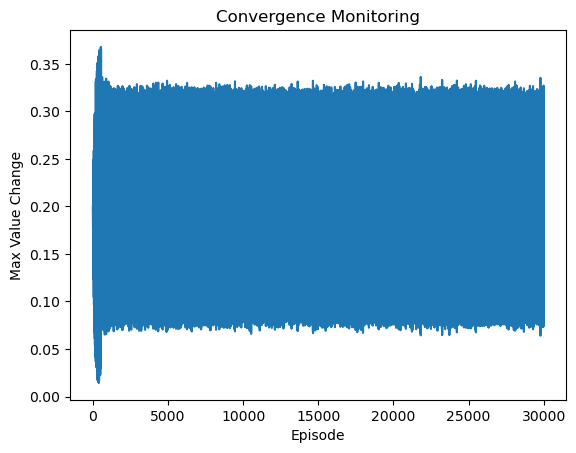

In [5]:
plt.plot(max_values)
plt.xlabel('Episode')
plt.ylabel('Max Value Change')
plt.title('Convergence Monitoring')
plt.show()

In [17]:
A_vec = [Simple_TD_learning(0.8, 0.01, 30000)[0] for _ in range(10)]

In [18]:
A_mean = np.mean(A_vec, axis=0)
A_mean

array([[ 3.59477299,  6.94533025,  6.97514317],
       [ 6.97485569,  9.9574213 , 10.81915663],
       [ 6.9149484 , 11.21476418, 10.        ]])

## Part B

V(2,3) = (1-p) * (r(3,3) + v(3,3)) + p * (r(3,3) + v(3,3)) + (1-p) * (r(1,3) + v(1,3)) + (1-p) * (r(2,2) + v(2,2)) + (1-p) * r(bad_squares) = 

In [20]:
A_mean

array([[ 3.59477299,  6.94533025,  6.97514317],
       [ 6.97485569,  9.9574213 , 10.81915663],
       [ 6.9149484 , 11.21476418, 10.        ]])

In [19]:
p = 0.8
V_2_3 = 0.2 * (10) + 0.8 * (10) + 0.2 * (A_mean[0,2] - 1) + 0.2 * (A_mean[1,1] - 1) + 0.2 * (-10)
V_2_3

10.98651289471158